# Creation Dataframe

In [176]:
import pandas as pd

import plotly.graph_objects as go
import numpy as np

def scroll_visu_dataframe(df, rest_index= False): 
    if rest_index : 
        y = df.reset_index()  # Cela ajoute l'index comme colonne(s) au DataFrame
    else : 
        y = df

    # Mettre à jour les headers pour inclure les noms des colonnes d'index
    headers = ['Index'] + list(y.columns)  # Ajoutez 'Index' ou le nom réel des niveaux d'index si nécessaire

    # Ajuster les valeurs pour inclure les index
    cells_values = [y.index] + [y[col] for col in y.columns]

    fig = go.Figure(data=[go.Table(
        header=dict(values=headers,
                    fill_color='paleturquoise',
                    align='left'),
        cells=dict(values=cells_values,  # Mise à jour pour inclure l'index
                fill_color='lavender',
                align='left'))
    ])

    fig.update_layout(
        margin=dict(l=0, r=0, t=0, b=0),
        paper_bgcolor='rgba(0,0,0,0)',  
        plot_bgcolor='rgba(0,0,0,0)',
    )

    fig.show()


# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('AMF_short_data.csv', delimiter=',')  # Ajustez le délimiteur si nécessaire
scroll_visu_dataframe(df)


In [177]:
df.columns

Index(['POSITION HOLDER\nDETENTEUR DE LA POSITION',
       'NOM DE L’ÉMETTEUR\nNAME OF THE ISSUER', 'ISIN',
       'POSITION COURTE NETTE DETENUE EN %\nNET SHORT POSITION SIZE IN PERCENTAGE',
       'DATE DE POSITION (AAAA-MM-JJ)\nPOSITION DATE (YYYY-MM-DD)'],
      dtype='object')

# Nombre d'apparition d'un DETENTEUR DE LA POSITION | NOM DE L’ÉMETTEUR

In [196]:
#qui = 'HOLDER'
qui = 'NOM DE L’ÉMETTEUR'

colonne = df.columns[(qui=='NOM DE L’ÉMETTEUR')*1]

nombre_uniques = df[colonne].nunique()
print(f"Nombre d'éléments uniques : {nombre_uniques}")

# Lister les éléments uniques
elements_uniques = df[colonne].unique()
print(f"Éléments uniques : {elements_uniques}")

Nombre d'éléments uniques : 118
Éléments uniques : ['REXEL' 'CGG' 'CASINO GUICHARD-PERRACHON' 'TECHNICOLOR'
 'EUTELSAT COMMUNICATIONS' 'BOURBON' 'RENAULT' 'CELLECTIS' 'ELIS' 'GENFIT'
 'ATOS SE' 'AIR FRANCE-KLM' 'ORPEA' 'GAZTRANSPORT ET TECHNIGAZ' 'VALEO'
 'SEB S.A.' 'CAPGEMINI' 'ARKEMA' 'EUROFINS SCIENTIFIC SE' 'SOCIETE BIC'
 'EIFFAGE' 'SOLOCAL GROUP' 'KORIAN' 'ELIOR GROUP' 'PEUGEOT S.A.' 'NOVACYT'
 'MAISONS DU MONDE' 'SES IMAGOTAG' 'VALLOUREC' 'ALSTOM' 'FAURECIA'
 'REMY COINTREAU' 'CLARIANE SE' 'ERAMET' 'BOURBON CORPORATION'
 'GENSIGHT BIOLOGICS S.A.' 'NAVYA' 'SMCP' 'SOITEC' 'SPIE SA' 'GECINA'
 'WORLDLINE' 'TELEVISION FRANCAISE 1' 'NEOEN' 'DBV TECHNOLOGIES'
 'TELEPERFORMANCE' 'CHARGEURS' 'EUROPCAR MOBILITY GROUP'
 'PUBLICIS GROUPE SA' 'AKKA TECHNOLOGIES' 'KAUFMAN & BROAD SA'
 'UBISOFT ENTERTAINMENT' 'SRP GROUPE' 'GAUSSIN S.A.' 'ALTEN' 'RALLYE'
 'NEXANS' 'EUROAPI' 'LAGARDERE SCA' 'NACON' 'MC PHY ENERGY' 'NEXITY'
 'SCOR SE' 'JCDECAUX SA' 'KLEPIERRE' 'ERYTECH PHARMA' 'TECHNIPFMC PLC'
 'C

In [189]:
#TODO chercher les Ticker de cette liste 


In [183]:
# Trier le DataFrame par 'POSITION HOLDER\nDETENTEUR DE LA POSITION'
dg = df.groupby(['POSITION HOLDER\nDETENTEUR DE LA POSITION','NOM DE L’ÉMETTEUR\nNAME OF THE ISSUER'],group_keys=True)[[
       'POSITION COURTE NETTE DETENUE EN %\nNET SHORT POSITION SIZE IN PERCENTAGE',
       'DATE DE POSITION (AAAA-MM-JJ)\nPOSITION DATE (YYYY-MM-DD)']].apply(lambda x: x)

# Étape 1: Convertir la colonne de date en datetime
dg['DATE DE POSITION (AAAA-MM-JJ)\nPOSITION DATE (YYYY-MM-DD)'] = pd.to_datetime(dg['DATE DE POSITION (AAAA-MM-JJ)\nPOSITION DATE (YYYY-MM-DD)'])

# Étape 2: Trier le DataFrame par la colonne de date
df_sorted = dg.sort_values(by='DATE DE POSITION (AAAA-MM-JJ)\nPOSITION DATE (YYYY-MM-DD)')


df_sorted = df_sorted.reset_index(level=2, drop=True)

df_sorted.set_index('DATE DE POSITION (AAAA-MM-JJ)\nPOSITION DATE (YYYY-MM-DD)', append=True, inplace=True)
df_sorted.head(10)
#scroll_visu_dataframe(df_sorted,True)

POSITION COURTE NETTE DETENUE EN %\nNET SHORT POSITION SIZE IN PERCENTAGE
POSITION HOLDER\nDETENTEUR DE LA POSITION NOM DE L’ÉMETTEUR\nNAME OF THE ISSUER              DATE DE POSITION (AAAA-MM-JJ)\nPOSITION DATE (Y...                                                                           
BALYASNY ASSET MANAGEMENT, L.P.           L'OREAL                                            2013-01-29                                                                                       0.50                        
                                                                                             2013-01-30                                                                                       0.38                        
BLACKWELL PARTNERS, LLC                   ARTPRICE.COM                                       2013-03-19                                                                                       0.82                        
CADIAN CAPITAL MANAGEMENT, LLC            COMPAGNIE INDUSTRIELLE ET\nFINANCIERE D'ENTREPR... 2013-04-22                                                                                       2.33                        
SUSQUEHANNA INTERNATIONAL GROUP\nLTD      FNAC SA                                            2013-06-21                                                                                       0.59                        
                                          GROUPE FNAC                                        2013-08-05                                                                                       0.81                        
QUANTITATIVE MANAGEMENT\nASSOCIATES LLC   NEXANS                                             2013-10-17                                                                                       1.00                        
HUTCHIN HILL CAPITAL, LP                  SOLOCAL GROUP                                      2014-05-16                                                                                       0.64                        
OXFORD ASSET MANAGEMENT LLP               BOLLORE                                            2014-12-01                                                                                       1.10                        
                                                                                             2014-12-03                                                                                       0.01

# Pour chaque DETENTEUR DE LA POSITION | NOM DE L’ÉMETTEUR affiche le nombre d'opppération

In [193]:
#qui = 'HOLDER'
qui = 'NOM DE L’ÉMETTEUR'

colonne = df.columns[(qui=='NOM DE L’ÉMETTEUR')*1]

nombre_apparitions = df[colonne].value_counts()

print(f"Nombre d'apparitions par {qui}  :")
nombre_apparitions = pd.DataFrame(nombre_apparitions)
scroll_visu_dataframe(nombre_apparitions)

Nombre d'apparitions par NOM DE L’ÉMETTEUR  :


In [194]:
import yfinance as yf
import datetime
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler


def visualiser_investissments(Investisseur, df,visu = False): 
    cgg_rows= df.loc[
    (df.index.get_level_values(0) == Investisseur) 
    
    ]
    if visu : 
        cgg_rows.index

    scroll_visu_dataframe(cgg_rows,rest_index=True)


def visualiser_investissment(Investisseur,investissement, df,visu = True): 
    cgg_rows= df.loc[
    (df.index.get_level_values(0) == Investisseur) &
    (df.index.get_level_values(1) == investissement)
    
    ]

    start_date = str(cgg_rows.index[0][-1]).split(' ')[0]
    print('Date de début :')
    print(start_date)
    print()
    if visu : 
        scroll_visu_dataframe(cgg_rows,rest_index=True)
    return cgg_rows , start_date


def visuel_action_investissement(start_date,cgg_rows,ticker):


    end_date = datetime.datetime.now().strftime('%Y-%m-%d')  
    # Télécharger les données du marché
    data = yf.download(ticker, start=start_date, end=end_date)


    def standardize(series):
        return (series - series.mean()) / series.std()

    # Standardiser les séries de données
    values_your_df_standardized = standardize(cgg_rows[cgg_rows.columns[0]])
    close_values_data_df_standardized = standardize(data['Close'])

    # Extraire les dates pour le tracé
    dates_your_df = pd.to_datetime([idx[2] for idx in cgg_rows.index])
    dates_data_df = data.index

    # Création du graphique
    plt.figure(figsize=(14, 7))

    # Tracer les séries de données standardisées
    plt.plot(dates_your_df, values_your_df_standardized, label='Votre Colonne (Standardisée)', marker='o', linestyle='-')
    plt.plot(dates_data_df, close_values_data_df_standardized, label='Valeurs de Clôture (Standardisées)', marker='', linestyle='--')

    # Configuration du graphique
    plt.title('Comparaison des Variations (Standardisées)')
    plt.xlabel('Date')
    plt.ylabel('Valeur Standardisée')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Afficher le graphique
    plt.show()
    return data


def visuel_action_invest_min_max(start_date, cgg_rows, ticker):
    
    end_date = datetime.datetime.now().strftime('%Y-%m-%d')  
    # Télécharger les données du marché
    data = yf.download(ticker, start=start_date, end=end_date)
    print(data )
    # Fonction pour normaliser une série de données en utilisant MinMaxScaler
    def normalize_min_max(series):
        scaler = MinMaxScaler(feature_range=(0, 1))
        series_scaled = scaler.fit_transform(series.values.reshape(-1,1)).flatten()  # Reshape pour scaler et re-flatten après
        return series_scaled

    # Normaliser les séries de données
    values_your_df_normalized = normalize_min_max(cgg_rows[cgg_rows.columns[0]])
    close_values_data_df_normalized = normalize_min_max(data['Close'])

    # Extraire les dates pour le tracé
    dates_your_df = pd.to_datetime([idx[2] for idx in cgg_rows.index])
    dates_data_df = data.index

    # Création du graphique
    plt.figure(figsize=(14, 7))

    # Tracer les séries de données normalisées
    plt.plot(dates_your_df, values_your_df_normalized, label='Votre Colonne (Normalisée)', marker='o', linestyle='-')
    plt.plot(dates_data_df, close_values_data_df_normalized, label='Valeurs de Clôture (Normalisées)', marker='', linestyle='--')

    # Configuration du graphique
    plt.title('Comparaison des Variations (Normalisées)')
    plt.xlabel('Date')
    plt.ylabel('Valeur Normalisée')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Afficher le graphique
    plt.show()

    return data


def benef(data,cgg_rows,total_titre) : 

    
    holding = np.array(cgg_rows[cgg_rows.columns[0]])

    initial_value = holding[0] 
    variation_holding =  holding[1:] - holding[:-1]

    dates = [index[2] for index in cgg_rows.index ]
    value_action = [data['Close'][str(date).split(' ')[0]] for date in  dates]
    #print(value_action[0])
    
    achat_init = value_action[0]  * total_titre * initial_value
    prix_achat = np.array(value_action) * total_titre * holding
    delta_achat = np.array(value_action[1:]) * total_titre * variation_holding
    #print(delta_achat)
    vente = np.array([achat_init + np.sum(delta_achat[:k]) for k in range(len(delta_achat)+1)])
    benef_par_jour = vente - prix_achat 


    dates_your_df = pd.to_datetime([idx[2] for idx in cgg_rows.index])

    # Création du graphique
    plt.figure(figsize=(14, 7))

    # Tracer les séries de données normalisées
    plt.plot(dates_your_df, benef_par_jour, label='benef', marker='o', linestyle='-')


    # Configuration du graphique
    plt.title('benef ')
    plt.xlabel('Date')
    plt.ylabel('Valeur euros')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Afficher le graphique
    plt.show()



    

# BLACKROCK INVESTMENT MANAGEMENT\nUK LIMITED

In [186]:
visualiser_investissments("BLACKROCK INVESTMENT MANAGEMENT\nUK LIMITED", df_sorted)

### CASINO GUICHARD-PERRACHON

In [187]:
cgg_rows , start_date = visualiser_investissment("BLACKROCK INVESTMENT MANAGEMENT\nUK LIMITED", 'CASINO GUICHARD-PERRACHON',df_sorted,False)

Date de début :
2017-10-02



/Users/sacha/Desktop/Finance Short net/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2017-10-02  50.189999  50.310001  49.345001  50.000000  42.870365   482222
2017-10-03  50.009998  52.419998  49.810001  52.000000  44.585178  1101235
2017-10-04  52.119999  52.189999  49.939999  50.380001  43.196182  1084090
2017-10-05  50.400002  50.900002  50.279999  50.590000  43.376232   310377
2017-10-06  50.680000  50.689999  50.310001  50.400002  43.213329   220713
...               ...        ...        ...        ...        ...      ...
2024-02-08   0.544000   0.544000   0.523000   0.526500   0.526500   323343
2024-02-09   0.530000   0.530000   0.501000   0.501000   0.501000   329807
2024-02-12   0.501000   0.522000   0.501000   0.502000   0.502000   175133
2024-02-13   0.520000   0.520000   0.502500   0.508000   0.508000   117058
2024-02-14   0.503000   0.506500   0.488000   0.497200   0.497200   243823

[1633 rows x 6 columns]


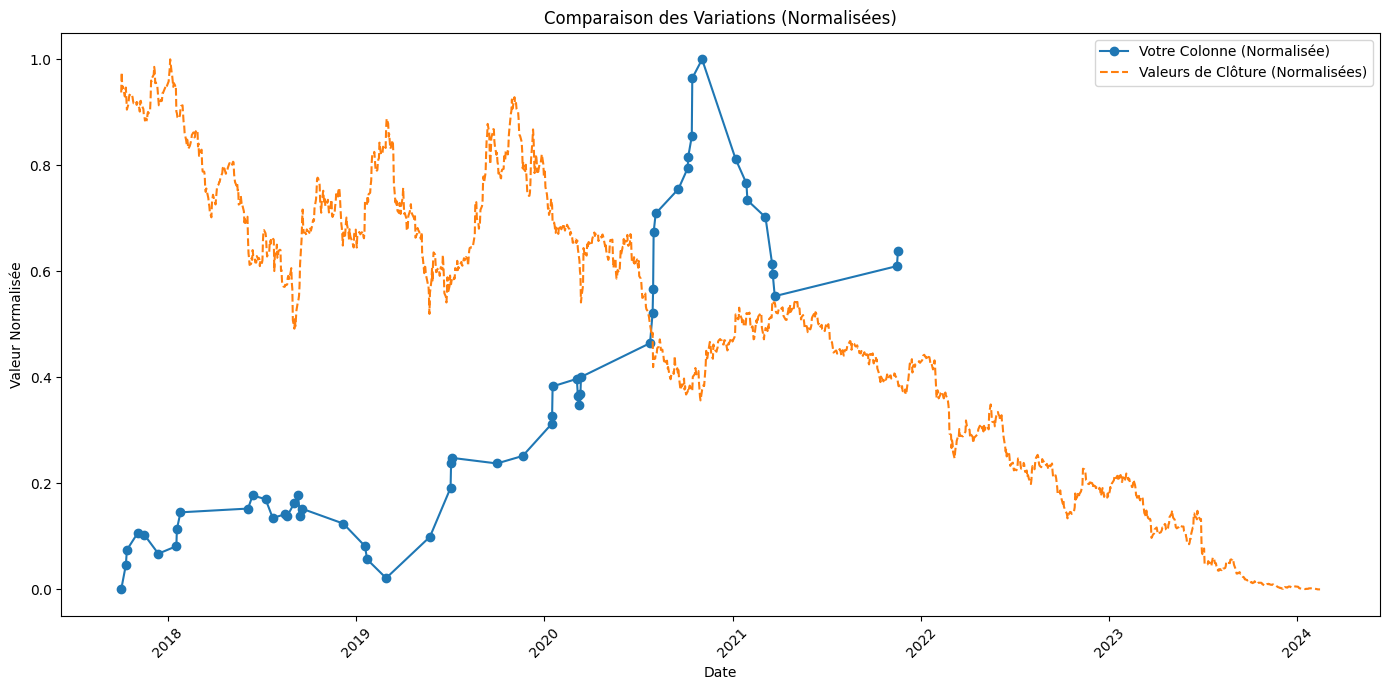

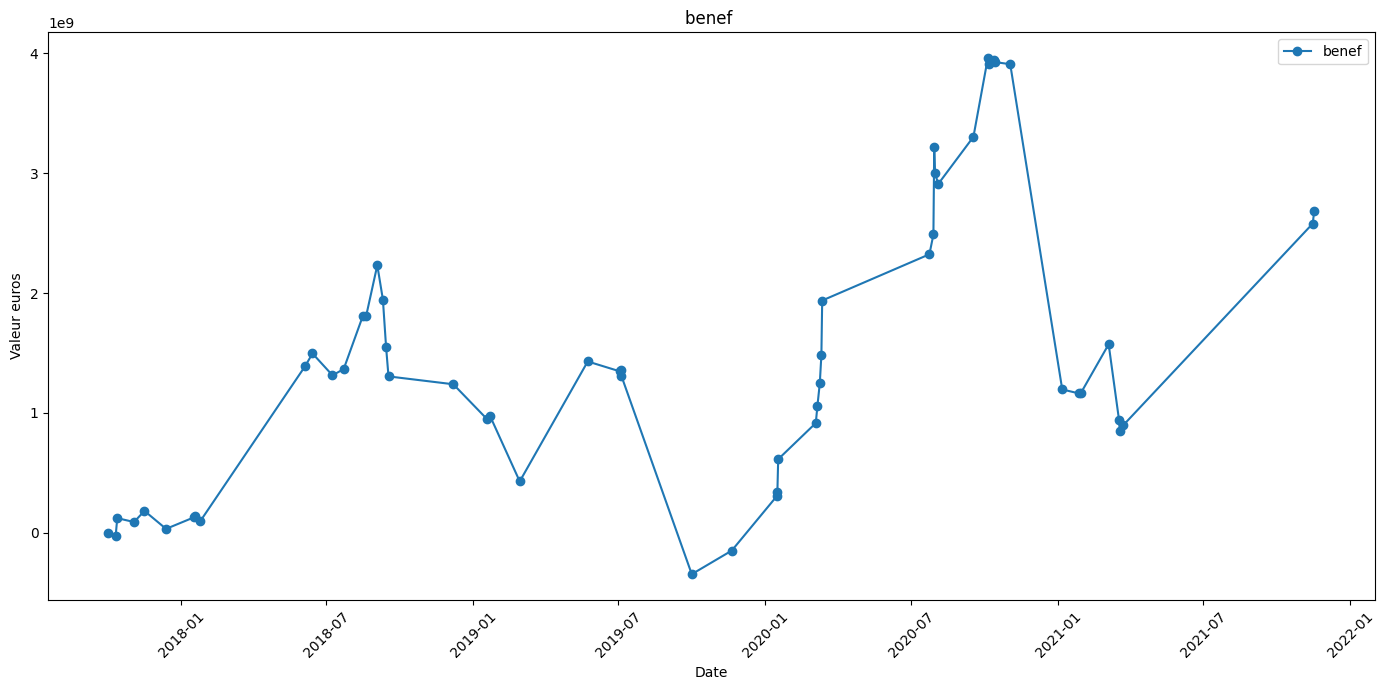

In [188]:
ticker = 'CO.PA'
data = visuel_action_invest_min_max(start_date,cgg_rows,ticker)
total_titre = 108_426_230
benef(data,cgg_rows,total_titre)

# CITADEL ADVISORS EUROPE LIMITED

In [126]:
visualiser_investissments("CITADEL ADVISORS EUROPE LIMITED", df_sorted)

### AIR FRANCE-KLM

In [134]:
cgg_rows , start_date= visualiser_investissment("CITADEL ADVISORS EUROPE LIMITED", 'AIR FRANCE-KLM',df_sorted,False)

Date de début :
2022-11-17



/Users/sacha/Desktop/Finance Short net/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed


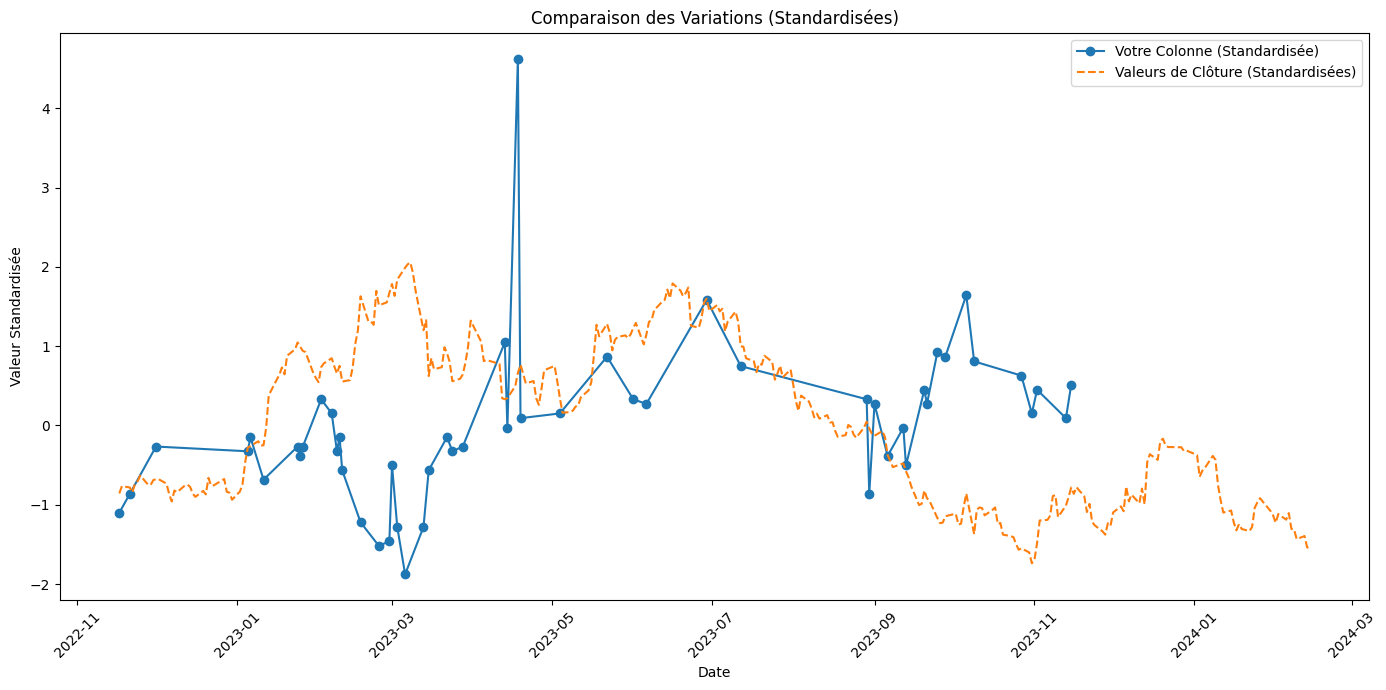

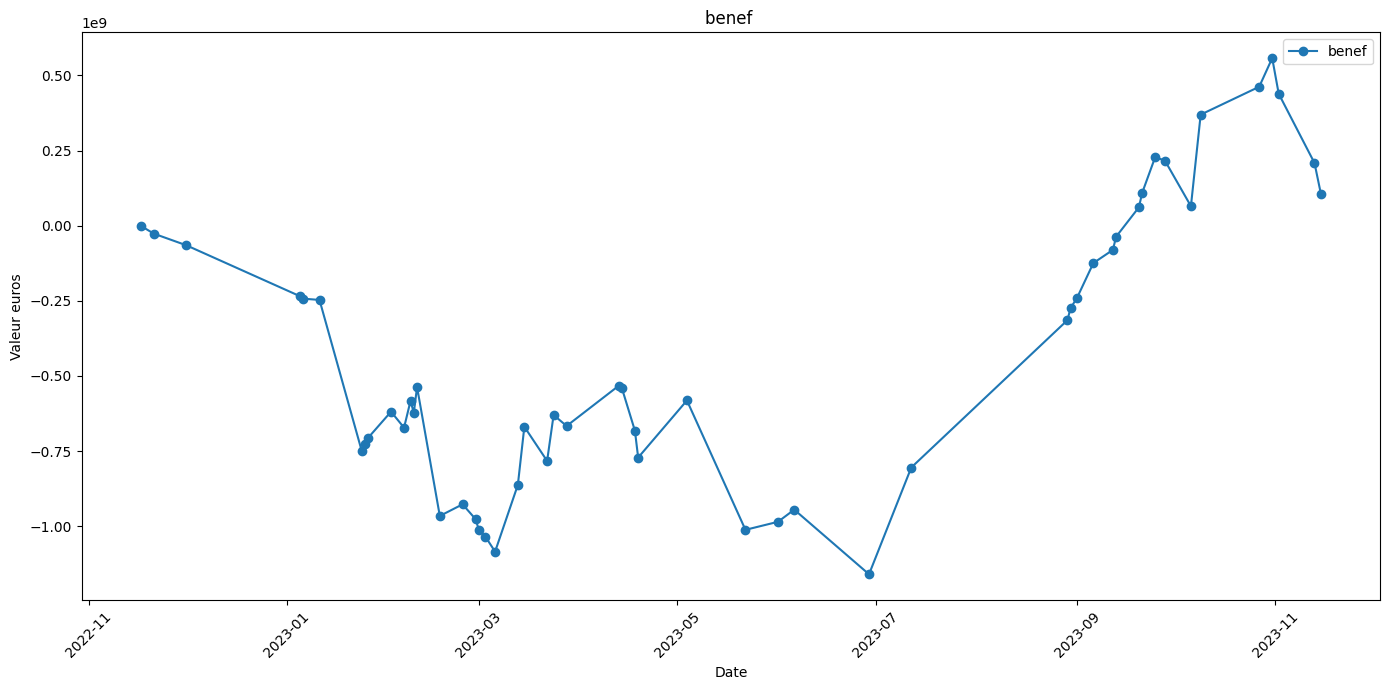

In [135]:
ticker = 'AF.PA'
data = visuel_action_investissement(start_date,cgg_rows,ticker)
total_titre = 257_053_613
benef(data,cgg_rows,total_titre)

### ELIS

In [136]:
cgg_rows , start_date = visualiser_investissment("CITADEL ADVISORS EUROPE LIMITED", 'ELIS',df_sorted,False)

Date de début :
2022-09-21



/Users/sacha/Desktop/Finance Short net/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed

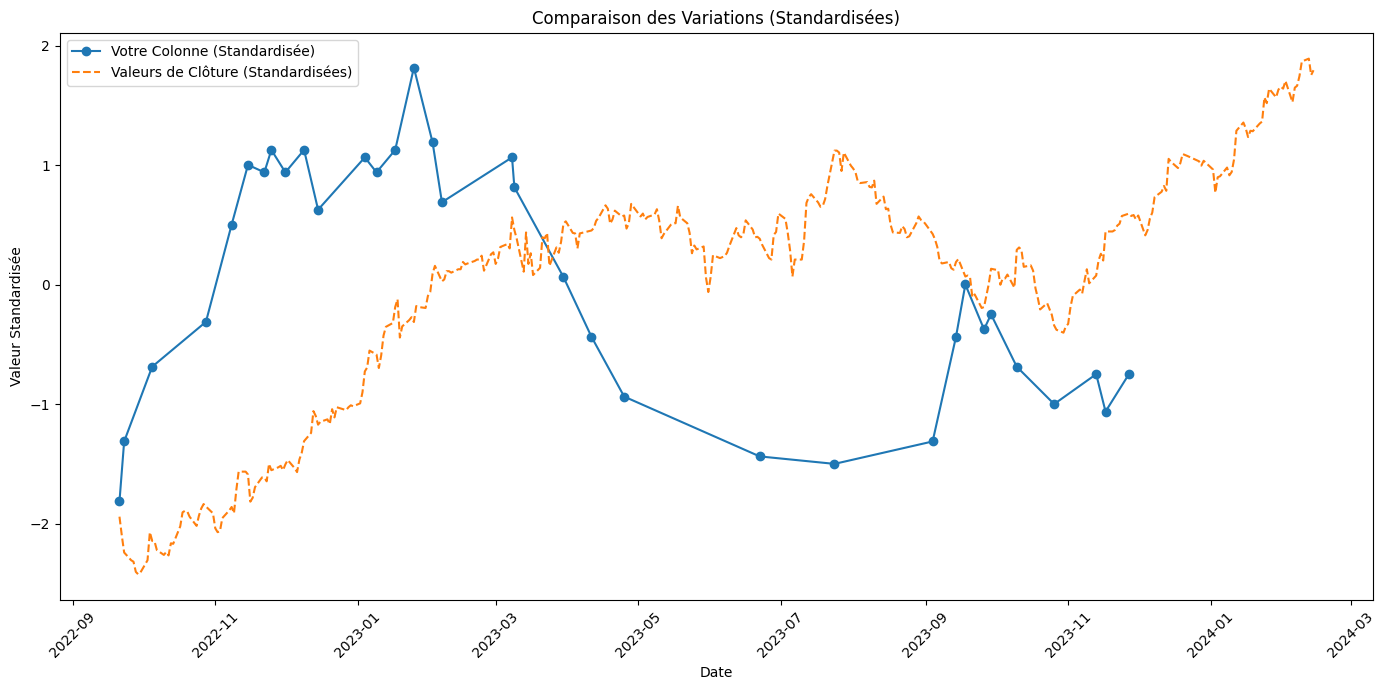

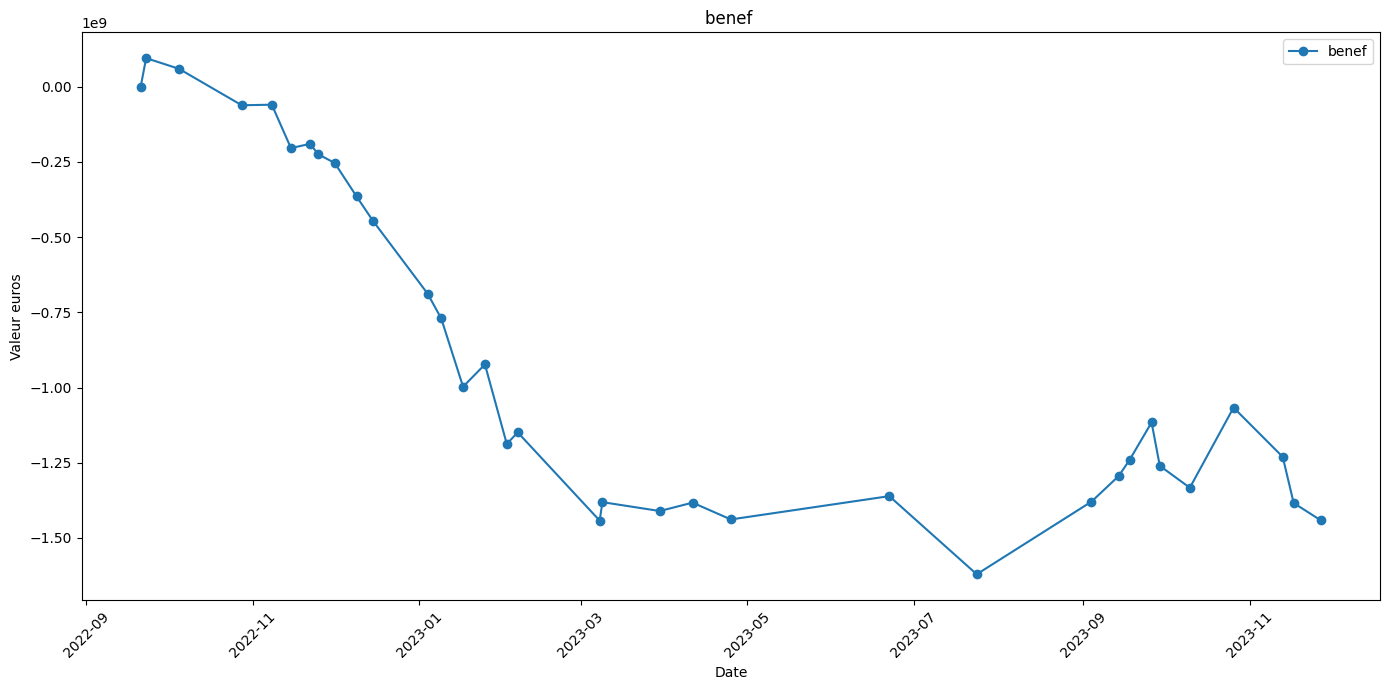

In [137]:
ticker = 'ELIS.PA'
data  = visuel_action_investissement(start_date,cgg_rows,ticker)
total_titre = 234_000_047
benef(data,cgg_rows,total_titre)

# QUBE RESEARCH & TECHNOLOGIES\nLIMITED 

In [138]:
visualiser_investissments("QUBE RESEARCH & TECHNOLOGIES\nLIMITED", df_sorted)

### CGG

In [139]:
cgg_rows , start_date = visualiser_investissment("QUBE RESEARCH & TECHNOLOGIES\nLIMITED", 'CGG',df_sorted,False)

Date de début :
2023-01-16



/Users/sacha/Desktop/Finance Short net/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed


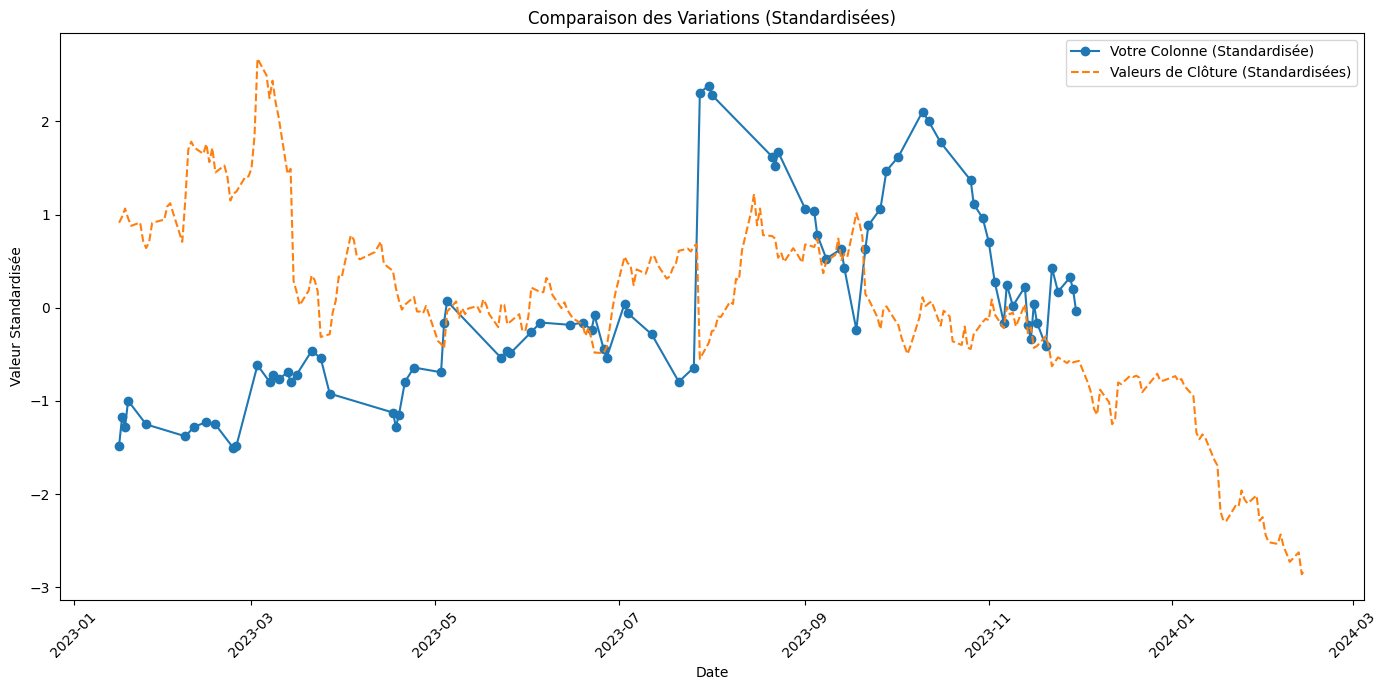

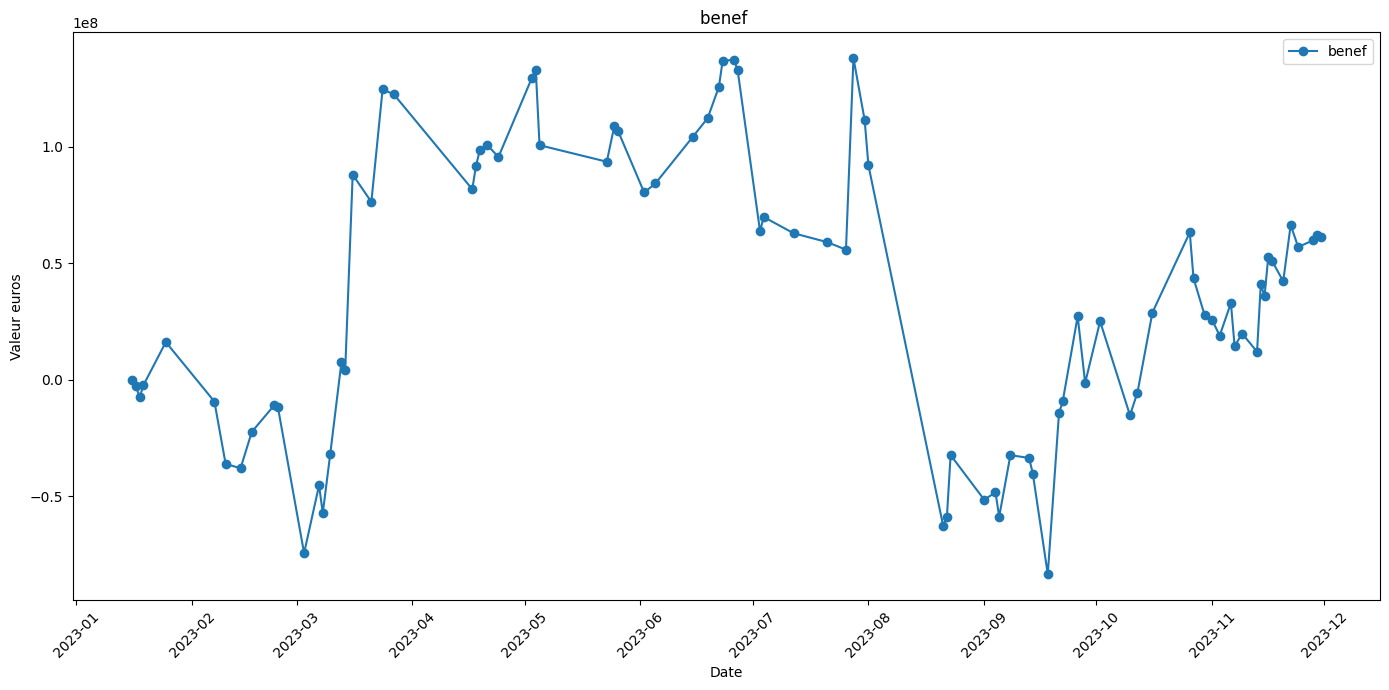

In [140]:
ticker = 'CGG.PA'
data = visuel_action_investissement(start_date,cgg_rows,ticker)

total_titre = 713_676_258
benef(data,cgg_rows,total_titre)

### ATOS

In [141]:
cgg_rows , start_date = visualiser_investissment("QUBE RESEARCH & TECHNOLOGIES\nLIMITED", 'ATOS SE',df_sorted,False)

Date de début :
2023-08-31



/Users/sacha/Desktop/Finance Short net/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed

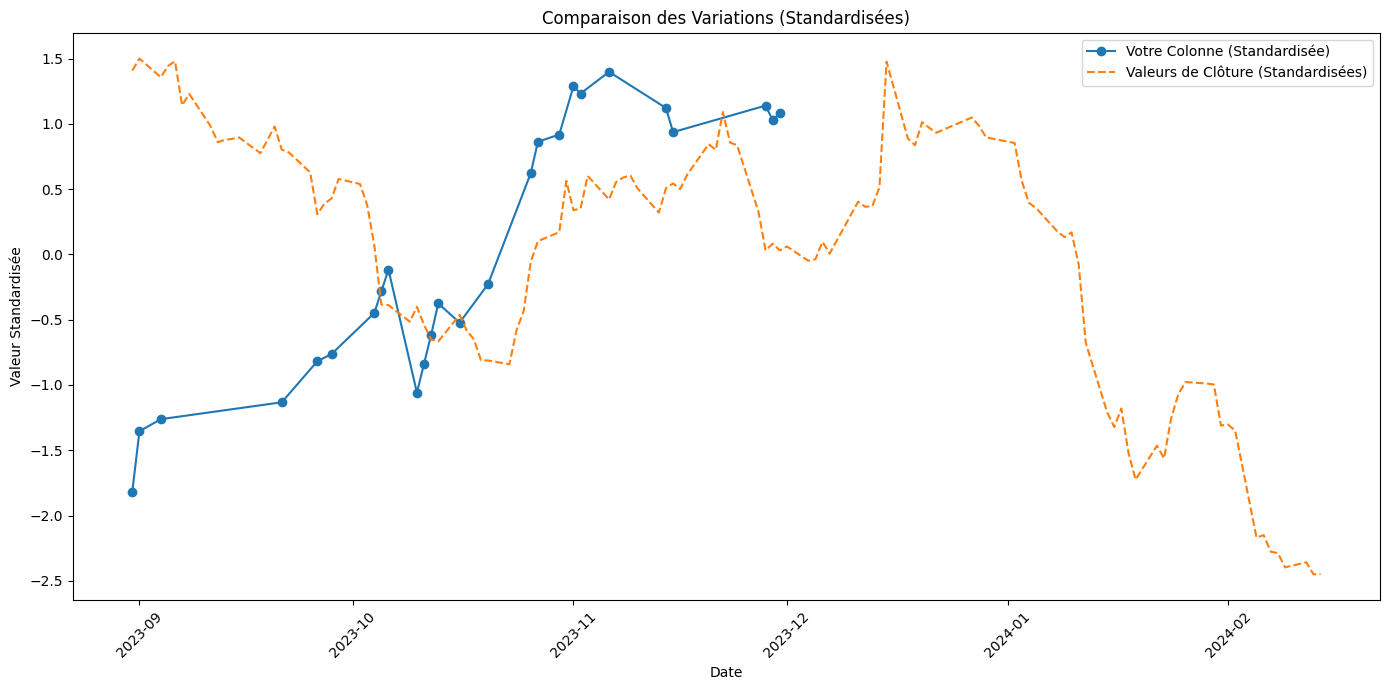

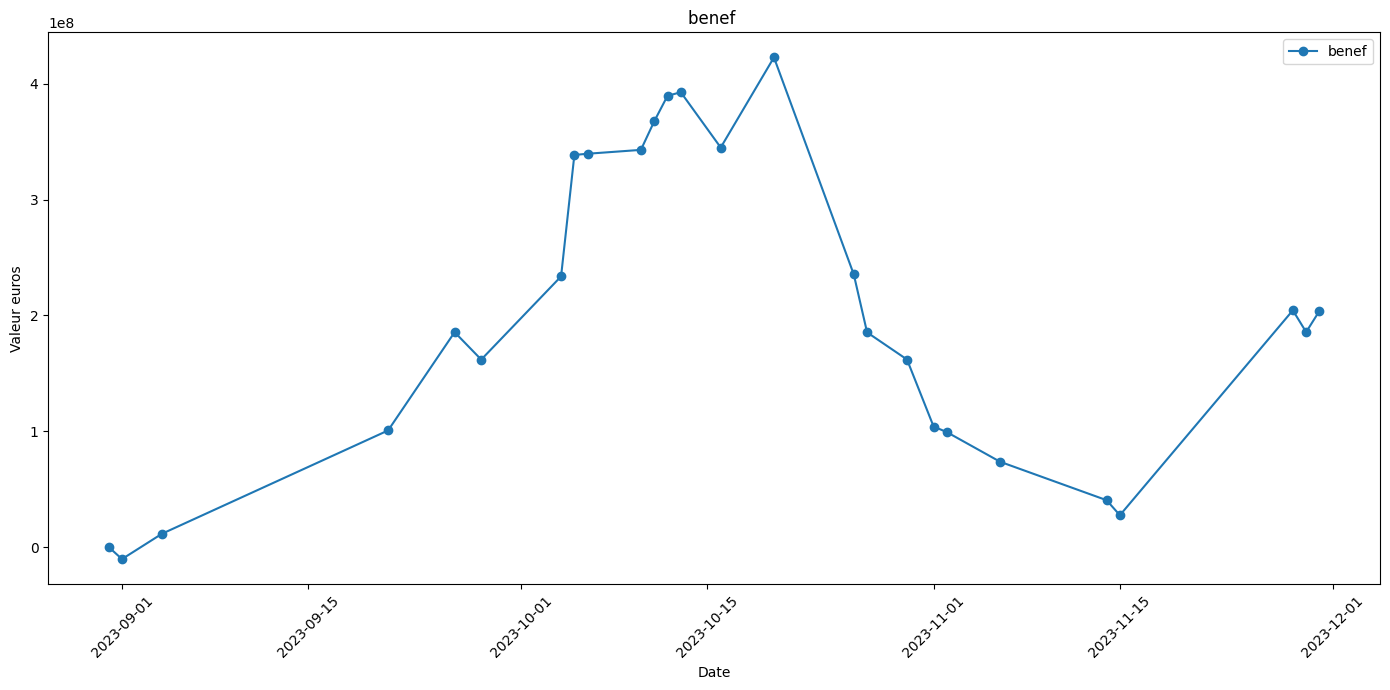

In [142]:
ticker = 'ATO.PA'
data = visuel_action_investissement(start_date,cgg_rows,ticker)

total_titre = 111_439_307
benef(data,cgg_rows,total_titre)

# MARSHALL WACE LLP

In [143]:
visualiser_investissments("MARSHALL WACE LLP", df_sorted)

### RENAULT 

/Users/sacha/Desktop/Finance Short net/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed

Date de début :
2022-03-24



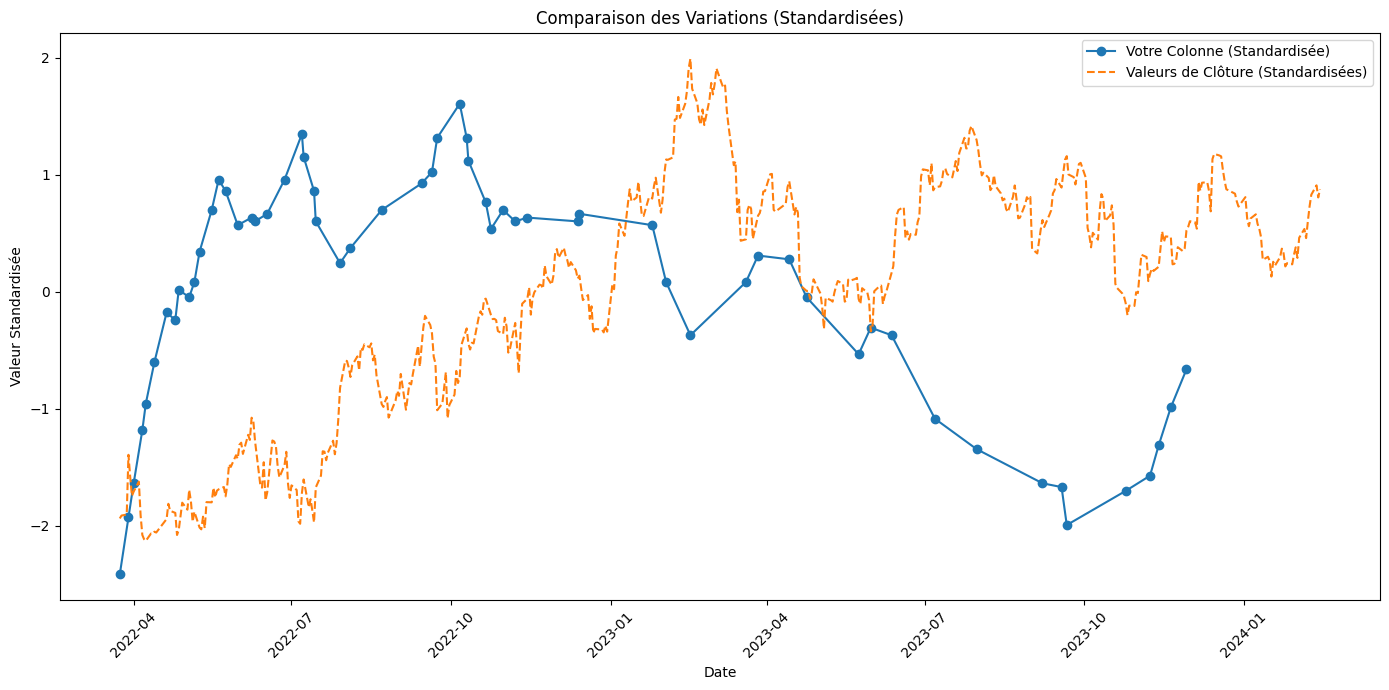

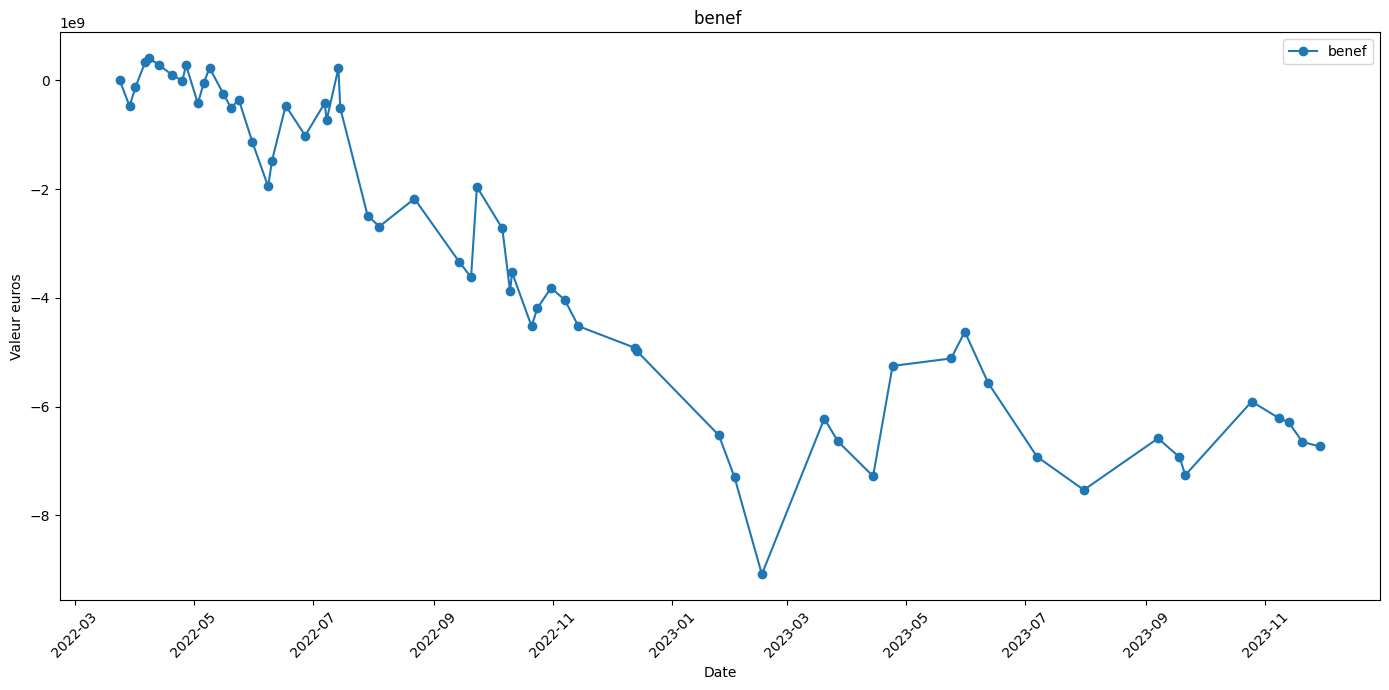

In [145]:
cgg_rows , start_date = visualiser_investissment("MARSHALL WACE LLP", 'RENAULT',df_sorted, False)

ticker = 'RNO.PA'
data = visuel_action_investissement(start_date,cgg_rows,ticker)

total_titre = 295_722_284
benef(data,cgg_rows,total_titre)

### CGG

In [146]:
cgg_rows , start_date = visualiser_investissment("MARSHALL WACE LLP", 'CGG',df_sorted,False)


Date de début :
2023-08-17



/Users/sacha/Desktop/Finance Short net/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed

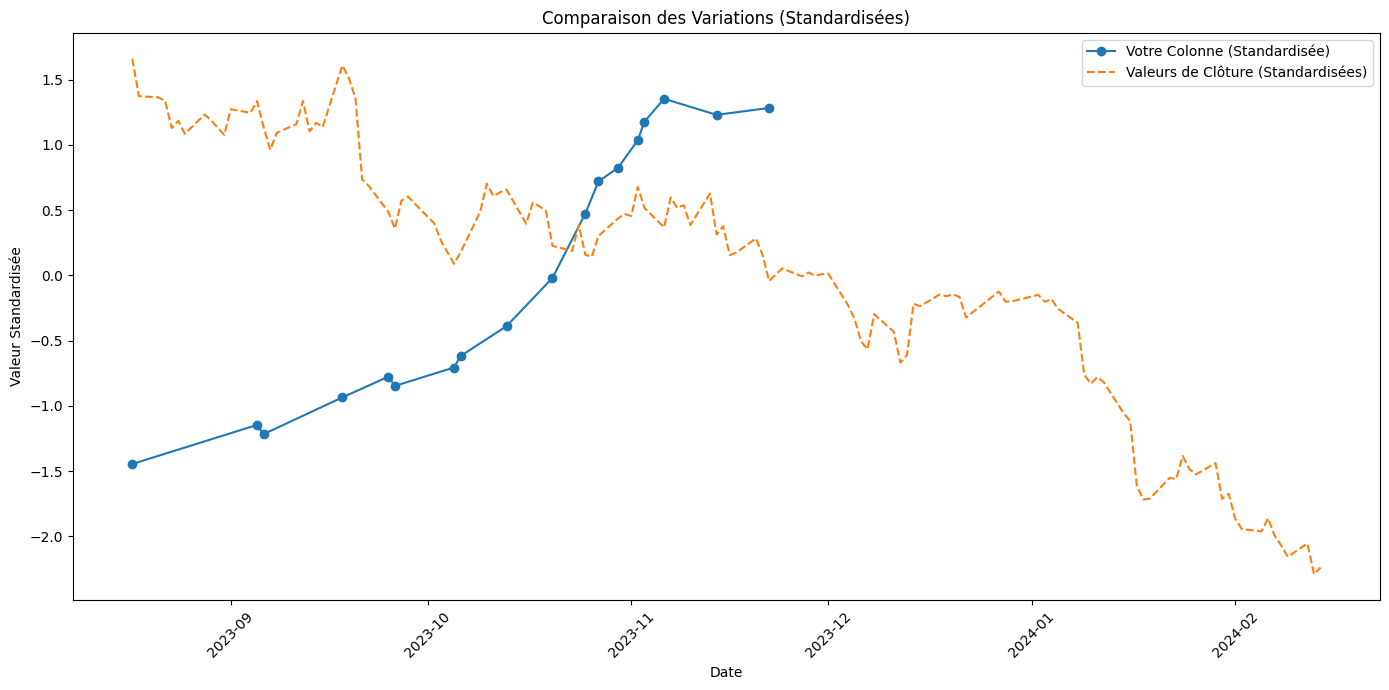

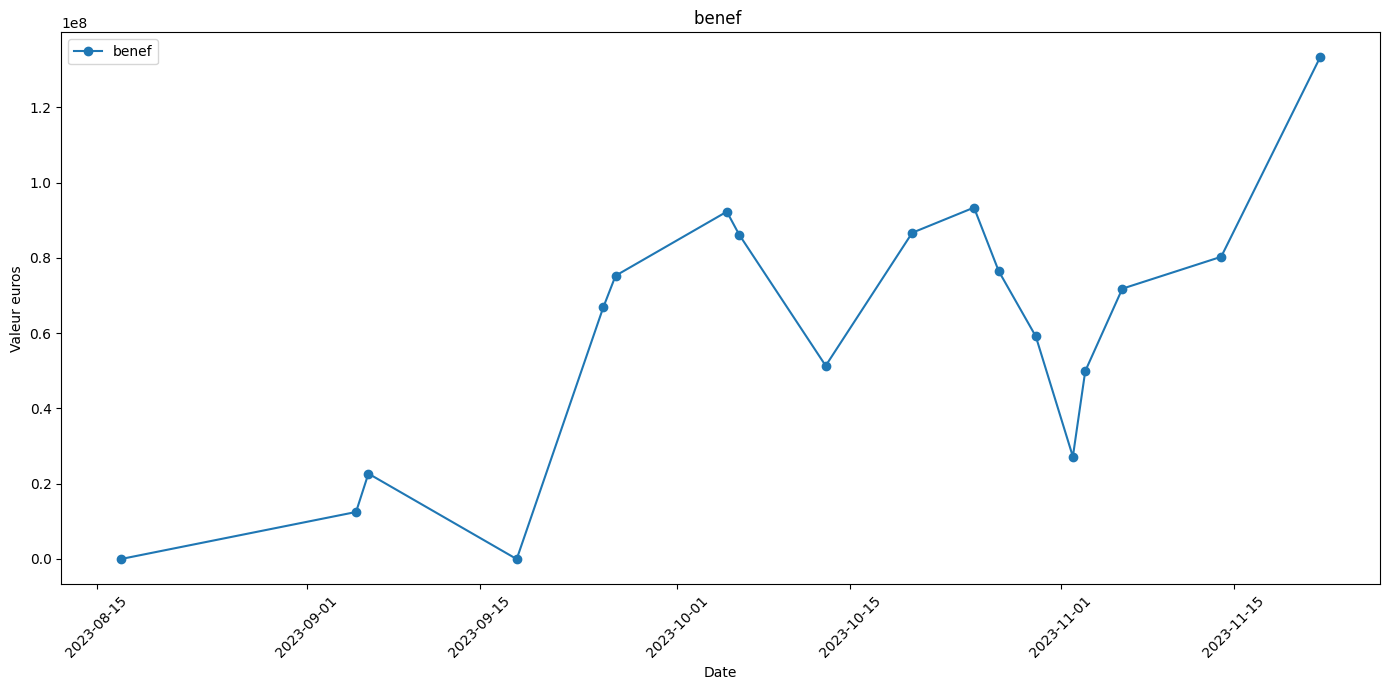

In [147]:
ticker = 'CGG.PA'
data = visuel_action_investissement(start_date,cgg_rows,ticker)

total_titre = 713_676_258
benef(data,cgg_rows,total_titre)


## AIR FRANCE-KLM

In [148]:
cgg_rows , start_date = visualiser_investissment("MARSHALL WACE LLP", 'AIR FRANCE-KLM',df_sorted,False)

Date de début :
2023-10-20



/Users/sacha/Desktop/Finance Short net/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed

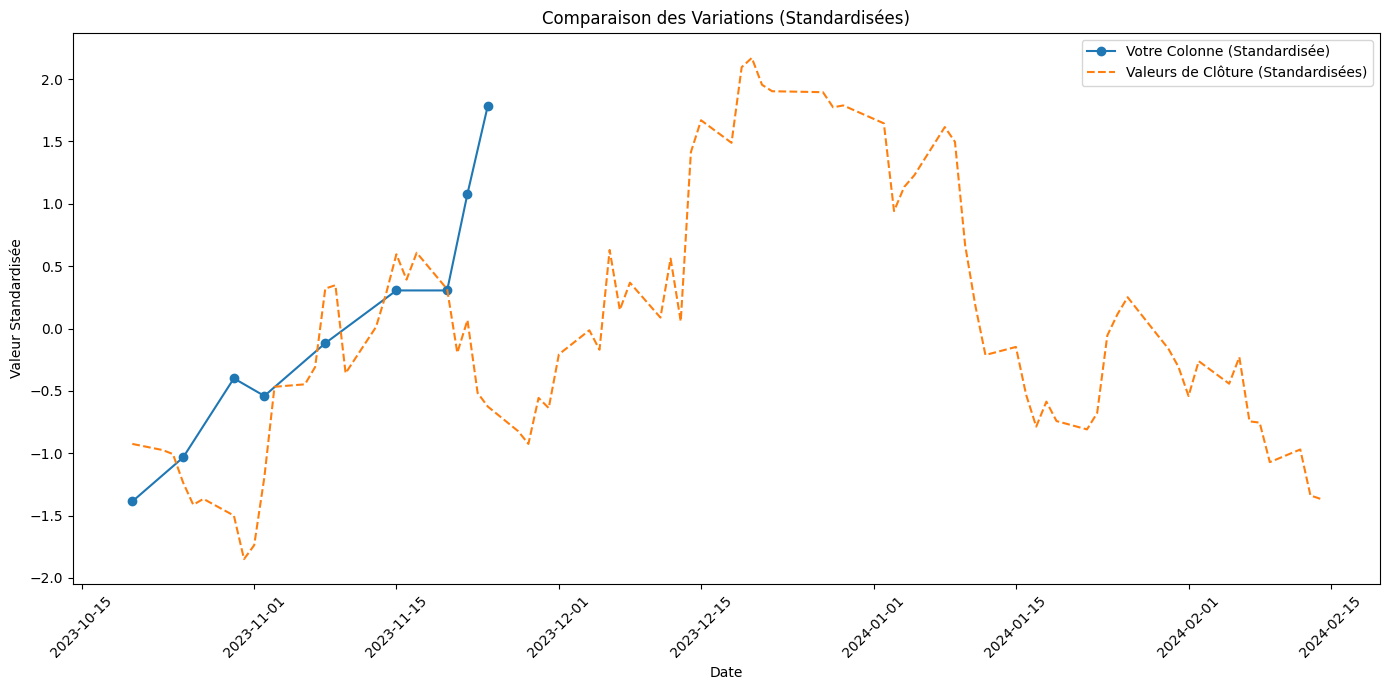

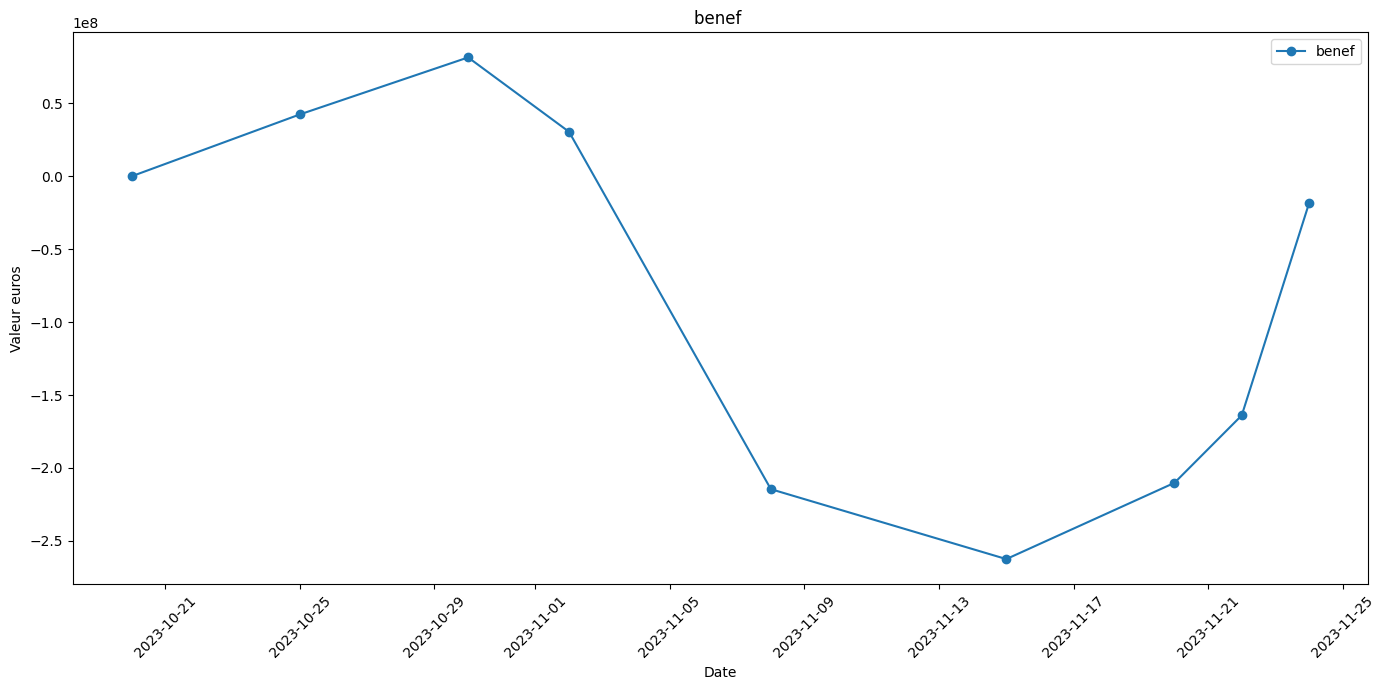

In [149]:
ticker = 'AF.PA'
data = visuel_action_investissement(start_date,cgg_rows,ticker)

total_titre = 257_053_613
benef(data,cgg_rows,total_titre)


# MILLENNIUM CAPITAL PARTNERS LLP

In [150]:
visualiser_investissments("MILLENNIUM CAPITAL PARTNERS LLP", df_sorted, True)

### CASINO\n GUICHARD-PERRACHON

In [151]:
cgg_rows , start_date = visualiser_investissment("MILLENNIUM CAPITAL PARTNERS LLP", 'CASINO GUICHARD-PERRACHON',df_sorted,False)

Date de début :
2023-03-27



/Users/sacha/Desktop/Finance Short net/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed

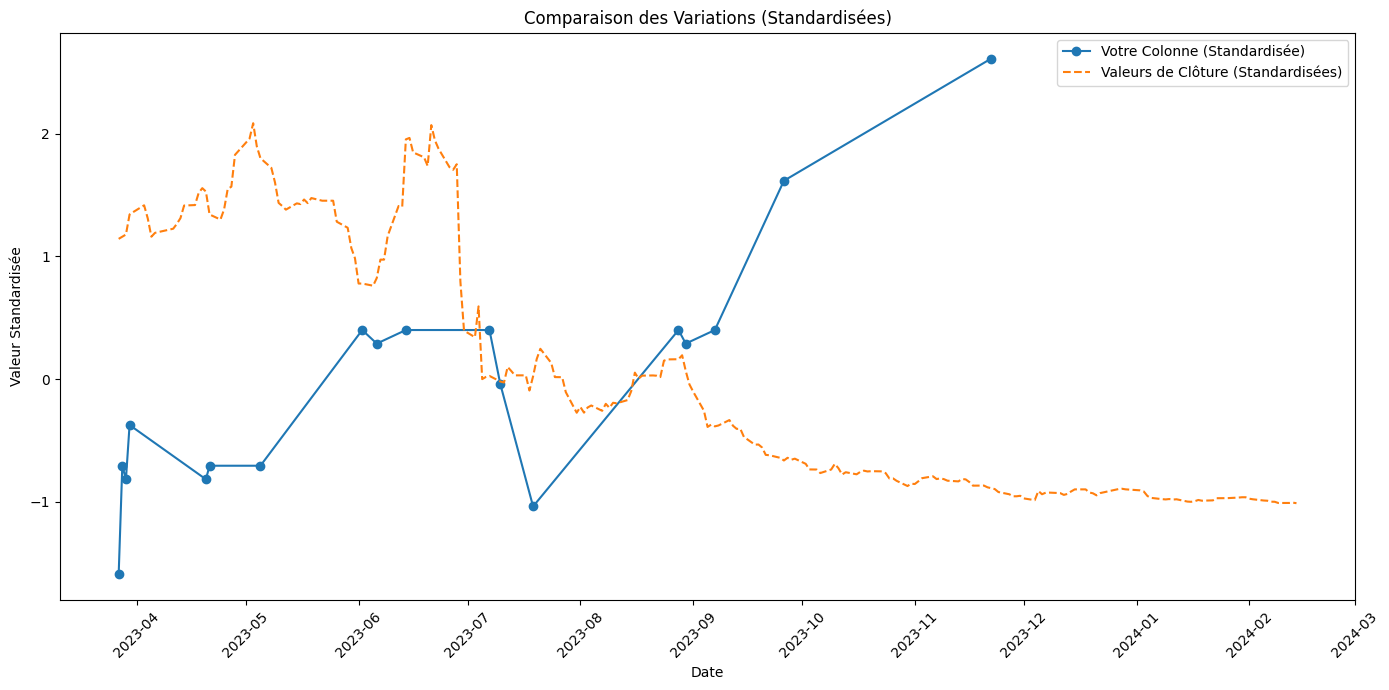

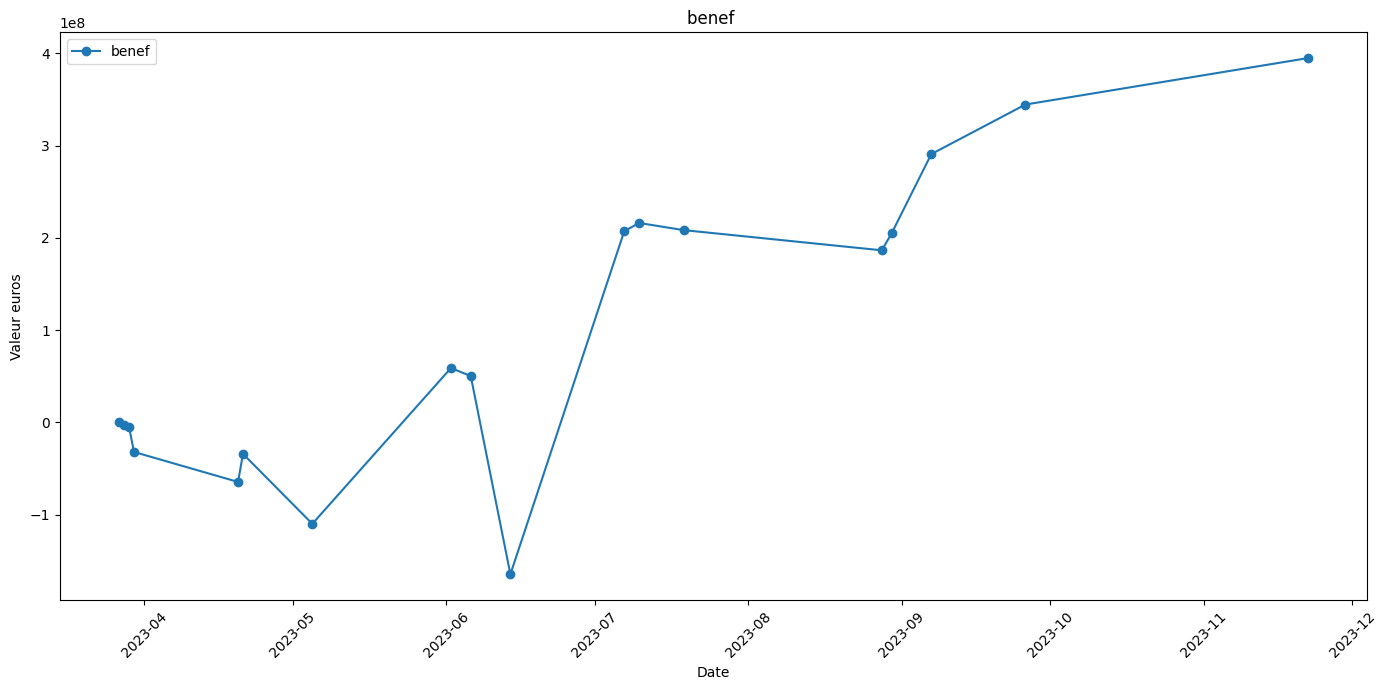

In [152]:
ticker = 'CO.PA'
data = visuel_action_investissement(start_date,cgg_rows,ticker)

total_titre = 108_426_230
benef(data,cgg_rows,total_titre)

### ATOS

In [154]:
cgg_rows , start_date = visualiser_investissment("MILLENNIUM CAPITAL PARTNERS LLP", 'ATOS SE',df_sorted,False)

Date de début :
2023-08-23



/Users/sacha/Desktop/Finance Short net/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed

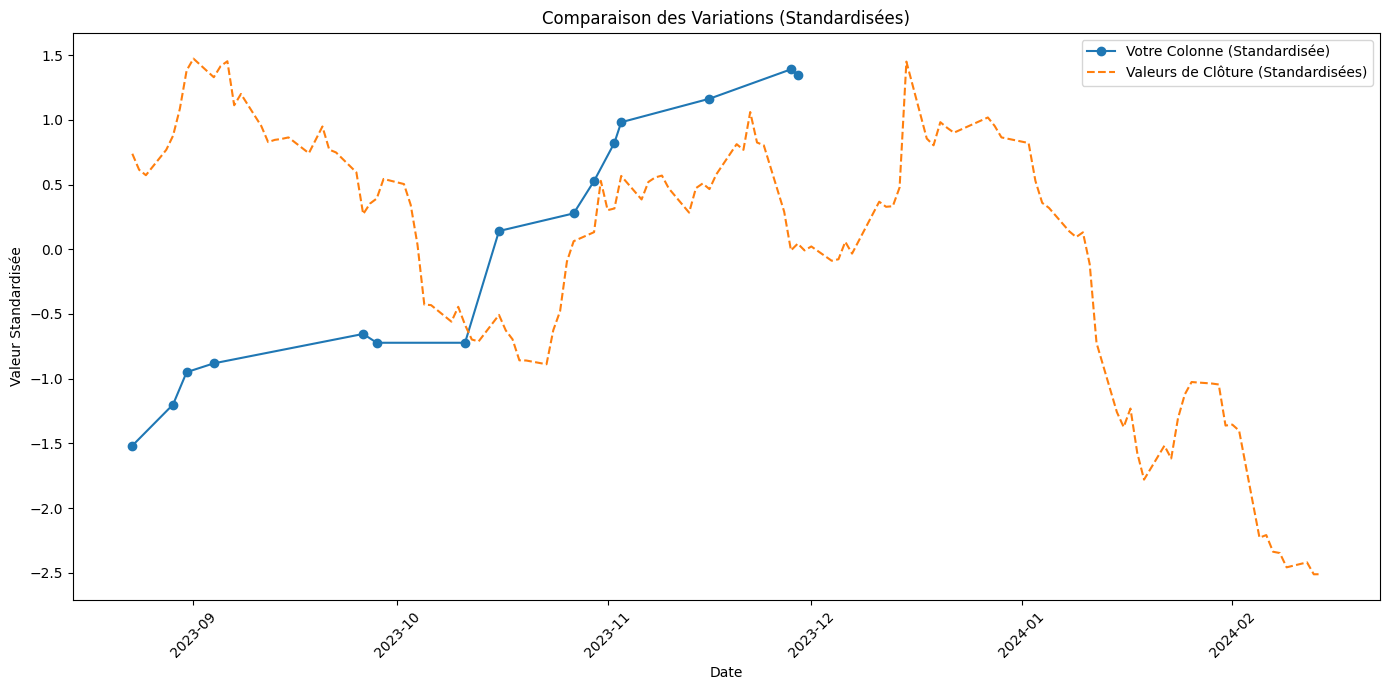

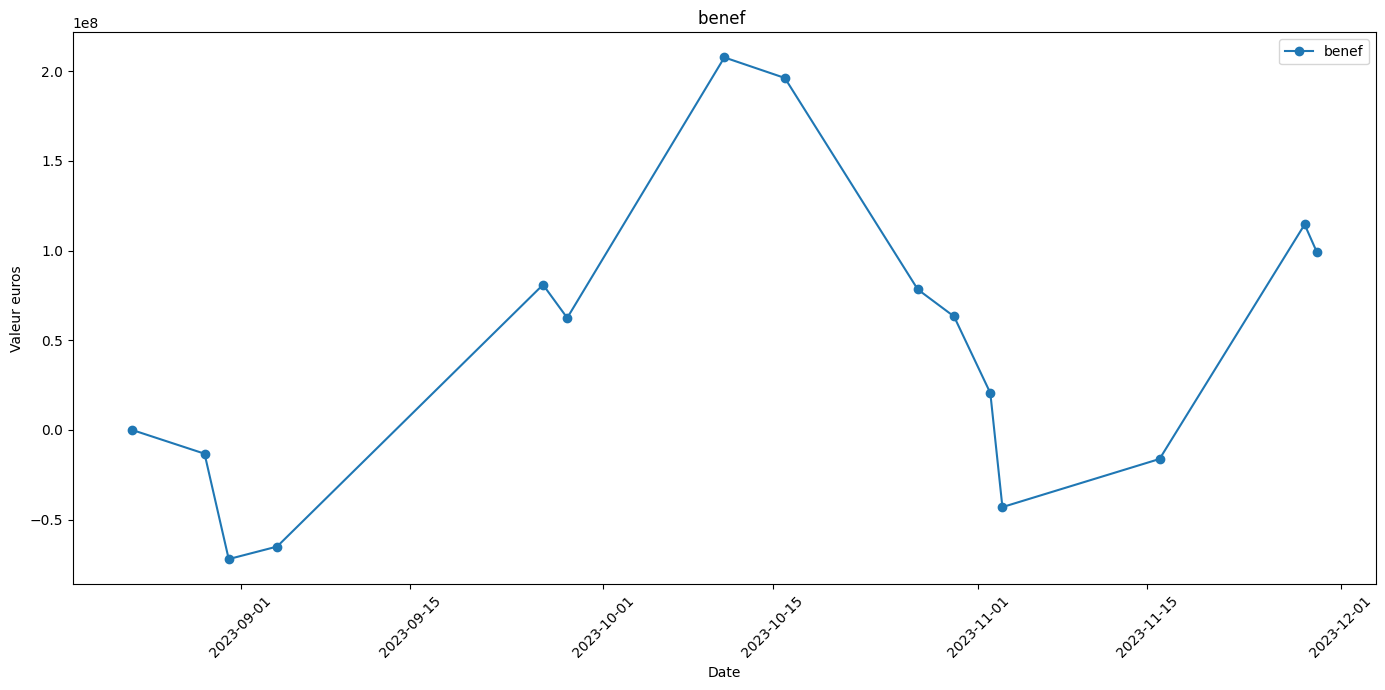

In [155]:

ticker = 'ATO.PA'
data = visuel_action_investissement(start_date,cgg_rows,ticker)

total_titre = 111_439_307
benef(data,cgg_rows,total_titre)

### REXEL

In [156]:
cgg_rows , start_date = visualiser_investissment("MILLENNIUM CAPITAL PARTNERS LLP", 'REXEL',df_sorted, False)

Date de début :
2021-11-16



/Users/sacha/Desktop/Finance Short net/env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

[*********************100%%**********************]  1 of 1 completed


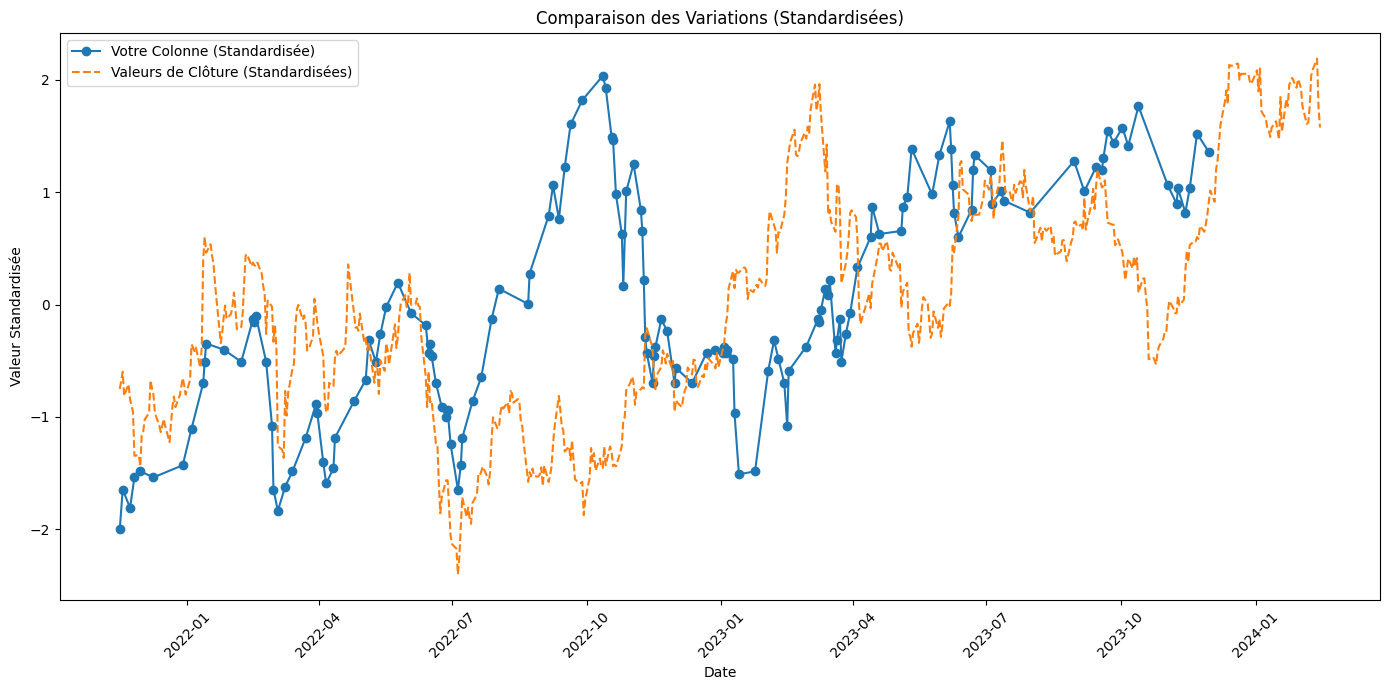

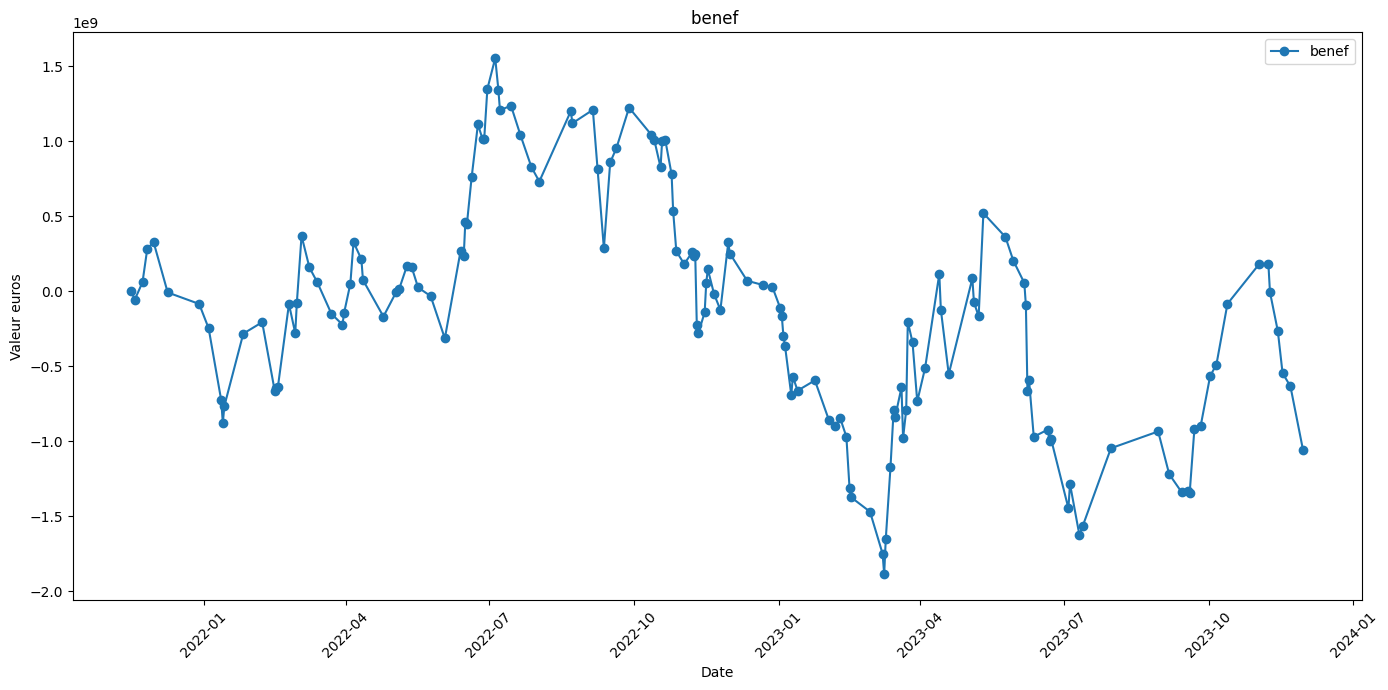

In [157]:
ticker = 'RXL.PA'
data = visuel_action_investissement(start_date,cgg_rows,ticker)
total_titre = 300_720_235
benef(data,cgg_rows,total_titre) 

# Recherche de période 

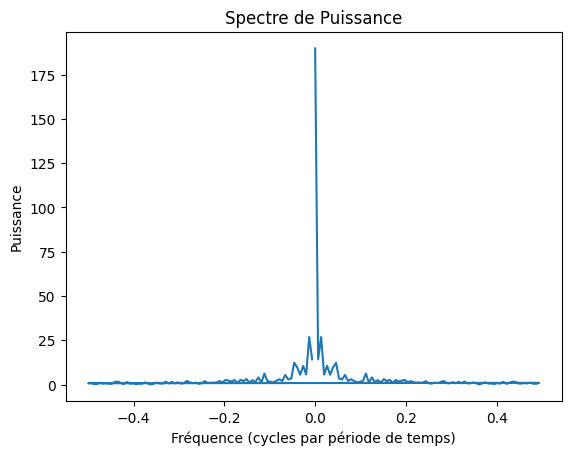

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Supposons que 'values' est un array numpy de vos valeurs standardisées
values =np.array(cgg_rows[cgg_rows.columns[0]]) 

# Analyse de Fourier pour détecter les fréquences dominantes
fft_values = np.fft.fft(values)
frequencies = np.fft.fftfreq(len(values))

# Tracer le spectre de puissance
power = np.abs(fft_values)
plt.plot(frequencies, power)
plt.title('Spectre de Puissance')
plt.xlabel('Fréquence (cycles par période de temps)')
plt.ylabel('Puissance')

# Identifier les pics dans le spectre de puissance pour détecter les cycles dominants
# Vous devrez définir un seuil pour déterminer ce qui est considéré comme un "pic" significatif

plt.show()


In [80]:
import numpy as np

# Effectuer l'analyse de Fourier
fft_values = np.fft.fft(values)
frequencies = np.fft.fftfreq(len(values), d=1)  # d est la période d'échantillonnage, mettre la valeur appropriée
power = np.abs(fft_values)

# Identifier les pics dans le spectre de puissance
threshold = 0.05 * np.max(power)  # Seuil arbitraire, à ajuster selon vos données
peaks = power > threshold

# Convertir les fréquences des pics en périodes temporelles (en jours)
peak_frequencies = frequencies[peaks]
peak_periods = 1 / peak_frequencies

# Afficher les pics et leurs périodes correspondantes
for freq, period in zip(peak_frequencies, peak_periods):
    print(f"Pic à la fréquence {freq} correspond à une période de {period} jours")

# Supposons que vous avez un DataFrame 'df' avec une colonne 'Date' et une colonne 'Values'
# Vous pouvez maintenant segmenter votre DataFrame en sous-ensembles correspondant à chaque période dominante
# Pour simplifier, prenons une période dominante pour l'exemple
dominant_period = np.min(peak_periods[peak_periods > 0])  # Période la plus courte non nulle
num_periods = int(len(values) / dominant_period)

# Créer des sous-ensembles de valeurs pour chaque cycle
subsets = [values[i * int(dominant_period):(i + 1) * int(dominant_period)] for i in range(num_periods)]

# Chaque sous-ensemble dans 'subsets' correspond à un cycle de la période dominante


Pic à la fréquence 0.0 correspond à une période de inf jours
Pic à la fréquence 0.006578947368421052 correspond à une période de 152.0 jours
Pic à la fréquence 0.013157894736842105 correspond à une période de 76.0 jours
Pic à la fréquence 0.02631578947368421 correspond à une période de 38.0 jours
Pic à la fréquence 0.039473684210526314 correspond à une période de 25.333333333333336 jours
Pic à la fréquence 0.046052631578947366 correspond à une période de 21.714285714285715 jours
Pic à la fréquence -0.046052631578947366 correspond à une période de -21.714285714285715 jours
Pic à la fréquence -0.039473684210526314 correspond à une période de -25.333333333333336 jours
Pic à la fréquence -0.02631578947368421 correspond à une période de -38.0 jours
Pic à la fréquence -0.013157894736842105 correspond à une période de -76.0 jours
Pic à la fréquence -0.006578947368421052 correspond à une période de -152.0 jours


/var/folders/fp/hfmjvl7d45gft5_1gf2dzn640000gn/T/ipykernel_12977/2712851753.py:14: RuntimeWarning:

divide by zero encountered in divide



In [81]:
subsets

[array([0.51, 0.64, 0.58, 0.68, 0.7 , 0.68, 0.72, 0.84, 0.99, 1.06, 1.12,
        1.1 , 1.06, 1.2 , 1.19, 1.21, 1.06, 0.85, 0.64, 0.57, 0.65]),
 array([0.7 , 0.81, 0.92, 0.89, 0.73, 0.66, 0.71, 0.81, 0.93, 1.  , 1.13,
        1.06, 1.15, 1.24, 1.32, 1.22, 1.18, 1.09, 1.12, 1.08, 0.99]),
 array([0.91, 0.88, 0.9 , 0.79, 0.64, 0.72, 0.81, 0.93, 1.01, 1.2 , 1.3 ,
        1.25, 1.35, 1.54, 1.64, 1.53, 1.7 , 1.84, 1.92, 2.  , 1.96]),
 array([1.8 , 1.79, 1.61, 1.48, 1.31, 1.62, 1.71, 1.56, 1.49, 1.33, 1.14,
        1.09, 0.99, 1.08, 1.11, 1.2 , 1.16, 0.99, 1.04, 0.99, 1.09]),
 array([1.1 , 1.09, 1.11, 1.09, 1.1 , 1.07, 0.89, 0.69, 0.7 , 1.03, 1.13,
        1.07, 0.99, 0.85, 1.03, 1.11, 1.2 , 1.19, 1.23, 1.3 , 1.28]),
 array([1.33, 1.09, 1.13, 1.2 , 1.06, 1.15, 1.22, 1.37, 1.47, 1.57, 1.48,
        1.49, 1.57, 1.6 , 1.76, 1.61, 1.74, 1.85, 1.76, 1.64, 1.55]),
 array([1.47, 1.56, 1.69, 1.74, 1.69, 1.58, 1.62, 1.59, 1.55, 1.72, 1.62,
        1.7 , 1.69, 1.73, 1.82, 1.78, 1.83, 1.77, 1.9 , 1.64, 